<h1> Analyzing Amazon Sales data </h1>
<h3>Problem Statement</h3>

<p>Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.</p>




<h4>Simple Code Fashion</h4>
Modular code will be available below.

<h4>Importing Libraries</h4>

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Reading Data</h4>

In [129]:
df = pd.read_csv('Amazon Sales data.csv')

In [130]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


<h4>ETL preprocess data</h4>

In [131]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')
df['Month Year'] = df['Order Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m'))

<h4>Monthly Sales Trend

Month-wise Sales Trend:
Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


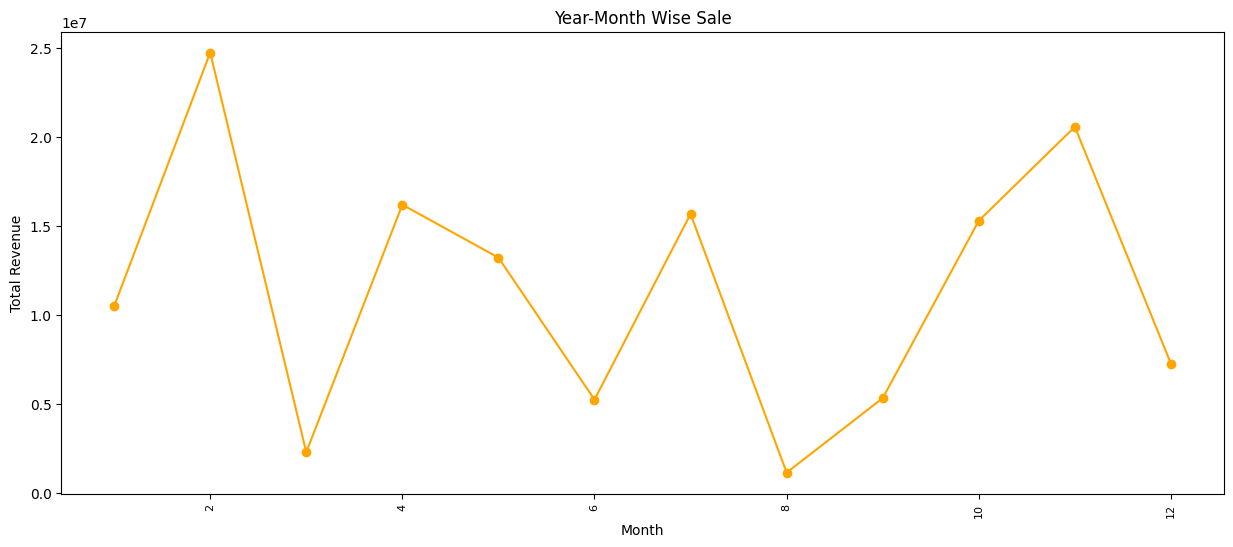

In [132]:
monthly_sales = df.groupby('Month')['Total Revenue'].sum()
print("Month-wise Sales Trend:")
print(monthly_sales)
plt.figure(figsize=(15, 6))
plt.title("Year-Month Wise Sale")
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='orange')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

<h4>Yearly Sales Trend


Year-wise Sales Trend:
Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


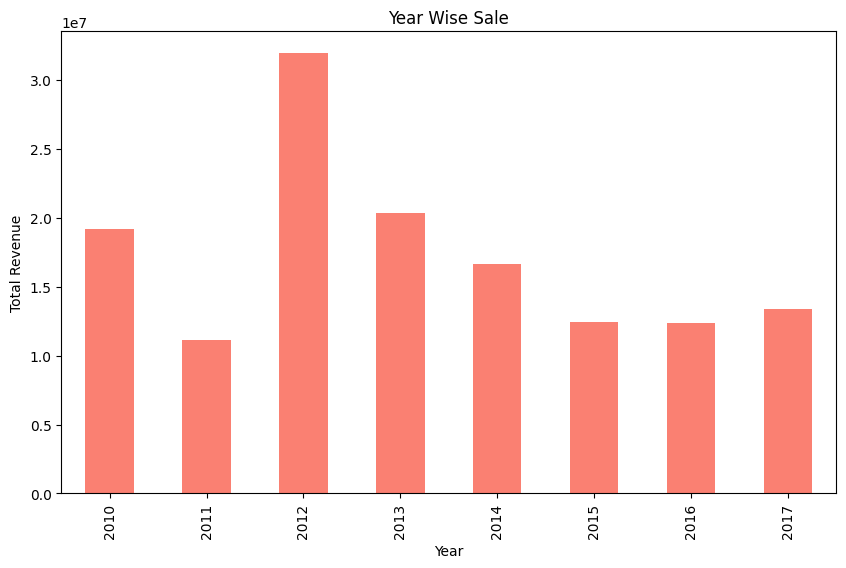

In [133]:
yearly_sales = df.groupby('Year')['Total Revenue'].sum()
print("\nYear-wise Sales Trend:")
print(yearly_sales)
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='salmon')
plt.title("Year Wise Sale")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

<h4>Yearly-Monthly Sales Trend


Yearly-Monthly Sales Trend:
Year-Month
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07    4445093.92
2012-08     576782.80
2012-09    4648152.72
2012-10    3042246.77
2013-02    3296425.02
2013-03     835759.10
2013-04    3262562.10
2013-06    1352867.40
2013-07    8545511.20
2013-08      89623.98
2013-09      71253.21
2013-10    2702770.40
2013-12     173676.25
2014-02    1819660.25
2014-04    4510578.10
2014-05    3060338.59
2014-06      75591.66
2014-07     688641.85
2014-08     455479.04
2014-09      20404.71
2014-10    1352370.65
2014-11    4647149.58
2015-01    5513227.50
2015-02    200

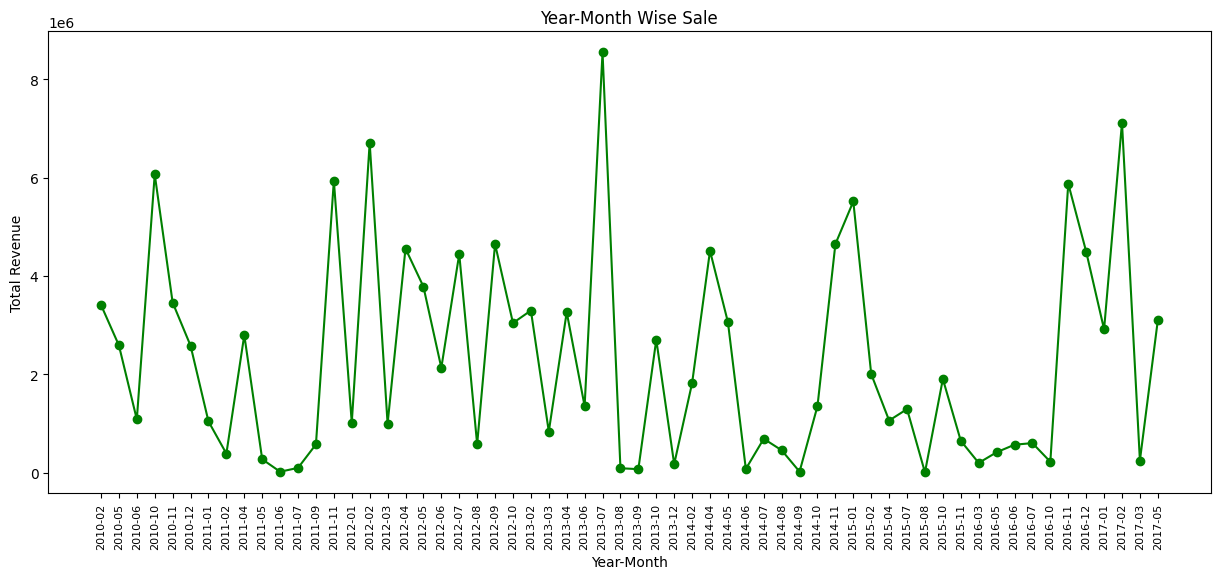

In [134]:
yearly_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum()
print("\nYearly-Monthly Sales Trend:")
print(yearly_monthly_sales)
plt.figure(figsize=(15, 6))
plt.title("Year-Month Wise Sale")
plt.plot(yearly_monthly_sales.index.astype(str), yearly_monthly_sales.values, marker='o', color='green')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.show()

<h4>Profit Trends

<ipython-input-135-7490fadbdf99>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trend = df.groupby('Month Year').sum()['Total Profit'].reset_index()


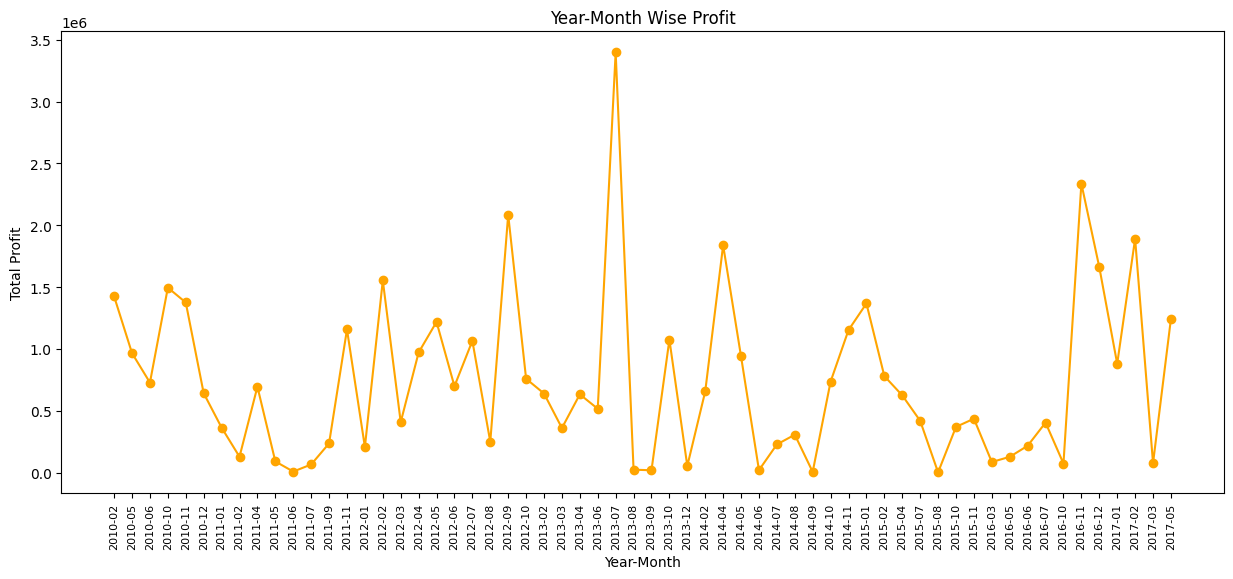

In [135]:
df_trend = df.groupby('Month Year').sum()['Total Profit'].reset_index()
plt.figure(figsize=(15, 6))
plt.title("Year-Month Wise Profit")
plt.plot(df_trend['Month Year'], df_trend['Total Profit'], marker='o', color='orange')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.show()

<ipython-input-136-d3157a71195c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year_trend = df.groupby('Year').sum()['Total Profit']


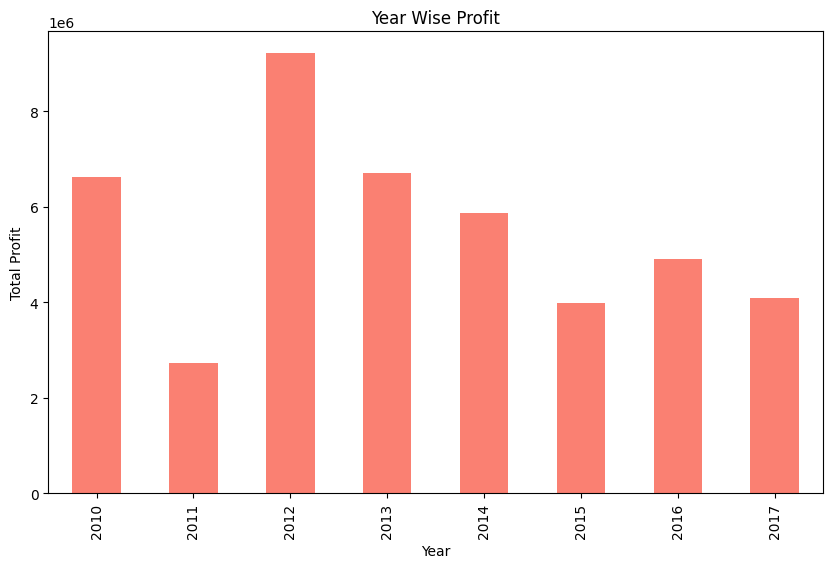

In [136]:
df_year_trend = df.groupby('Year').sum()['Total Profit']
plt.figure(figsize=(10, 6))
df_year_trend.plot(kind='bar', color='salmon')
plt.title("Year Wise Profit")
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.show()

<ipython-input-137-d84d3fa0ba0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month_trend = df.groupby('Month').sum()['Total Profit']


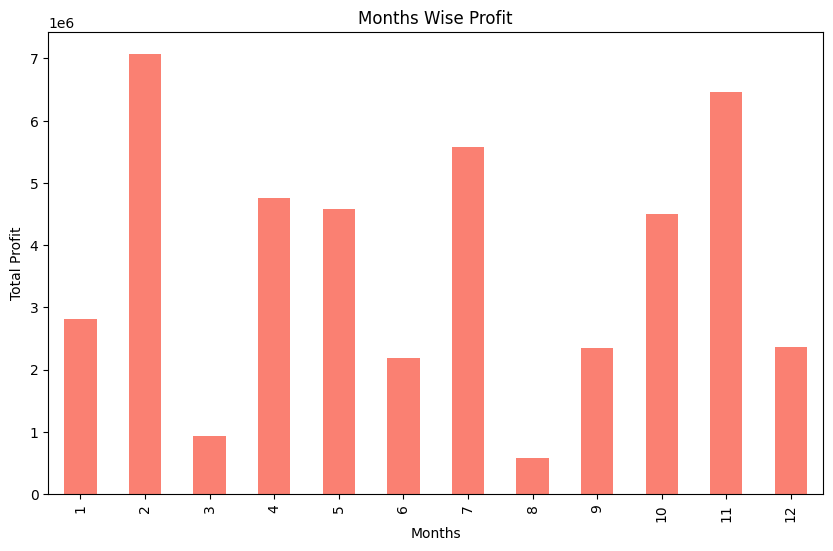

In [137]:
df_month_trend = df.groupby('Month').sum()['Total Profit']
plt.figure(figsize=(10, 6))
df_month_trend.plot(kind='bar', color='salmon')
plt.title("Months Wise Profit")
plt.xlabel("Months")
plt.ylabel("Total Profit")
plt.show()

<h3>Modular Code Fashion</h3>

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
def read_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Year'] = df['Order Date'].dt.year
    df['Month'] = df['Order Date'].dt.month
    df['Year-Month'] = df['Order Date'].dt.to_period('M')
    df['Month Year'] = df['Order Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m'))
    return df

In [140]:
def plot_monthly_sales_trend(df):
    monthly_sales = df.groupby('Month')['Total Revenue'].sum()
    print("Month-wise Sales Trend:")
    print(monthly_sales)
    plt.figure(figsize=(15, 6))
    plt.title("Year-Month Wise Sale")
    plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='orange')
    plt.xticks(rotation='vertical', size=8)
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.show()

In [141]:
def plot_yearly_sales_trend(df):
    yearly_sales = df.groupby('Year')['Total Revenue'].sum()
    print("\nYear-wise Sales Trend:")
    print(yearly_sales)
    plt.figure(figsize=(10, 6))
    yearly_sales.plot(kind='bar', color='salmon')
    plt.title("Year Wise Sale")
    plt.xlabel("Year")
    plt.ylabel("Total Revenue")
    plt.show()

In [142]:
def plot_yearly_monthly_sales_trend(df):
    yearly_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum()
    print("\nYearly-Monthly Sales Trend:")
    print(yearly_monthly_sales)
    plt.figure(figsize=(15, 6))
    plt.title("Year-Month Wise Sale")
    plt.plot(yearly_monthly_sales.index.astype(str), yearly_monthly_sales.values, marker='o', color='green')
    plt.xticks(rotation='vertical', size=8)
    plt.xlabel("Year-Month")
    plt.ylabel("Total Revenue")
    plt.show()

In [143]:
def plot_profit_trends(df):
    df_trend = df.groupby('Month Year').sum()['Total Profit'].reset_index()
    plt.figure(figsize=(15, 6))
    plt.title("Year-Month Wise Profit")
    plt.plot(df_trend['Month Year'], df_trend['Total Profit'], marker='o', color='orange')
    plt.xticks(rotation='vertical', size=8)
    plt.xlabel("Year-Month")
    plt.ylabel("Total Profit")
    plt.show()

    df_year_trend = df.groupby('Year').sum()['Total Profit']
    plt.figure(figsize=(10, 6))
    df_year_trend.plot(kind='bar', color='salmon')
    plt.title("Year Wise Profit")
    plt.xlabel("Year")
    plt.ylabel("Total Profit")
    plt.show()

    df_month_trend = df.groupby('Month').sum()['Total Profit']
    plt.figure(figsize=(10, 6))
    df_month_trend.plot(kind='bar', color='salmon')
    plt.title("Months Wise Profit")
    plt.xlabel("Months")
    plt.ylabel("Total Profit")
    plt.show()

Month-wise Sales Trend:
Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


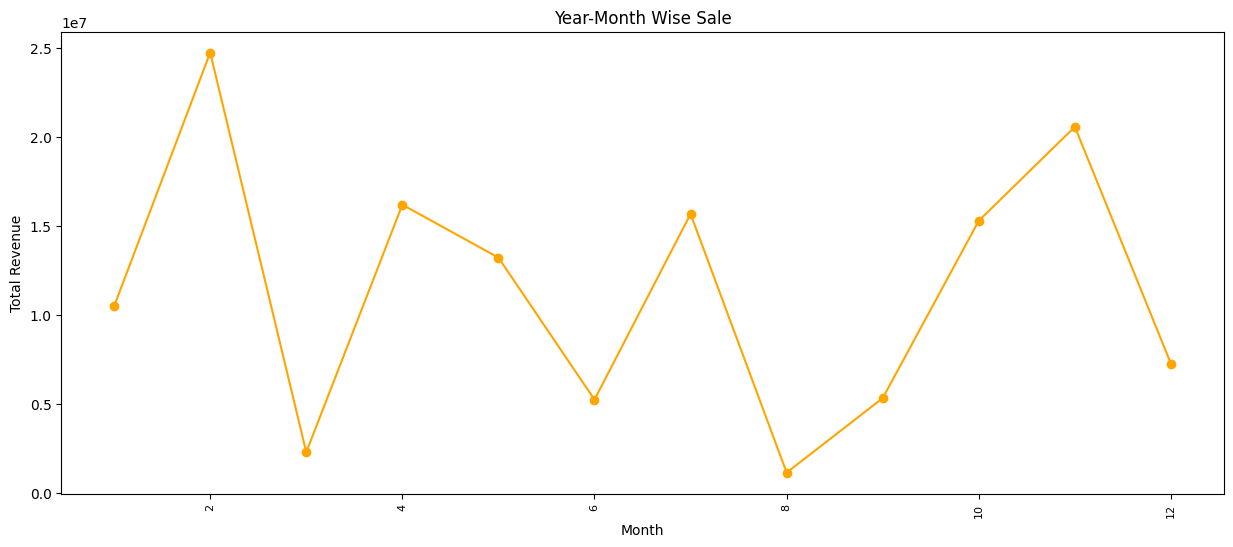


Year-wise Sales Trend:
Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


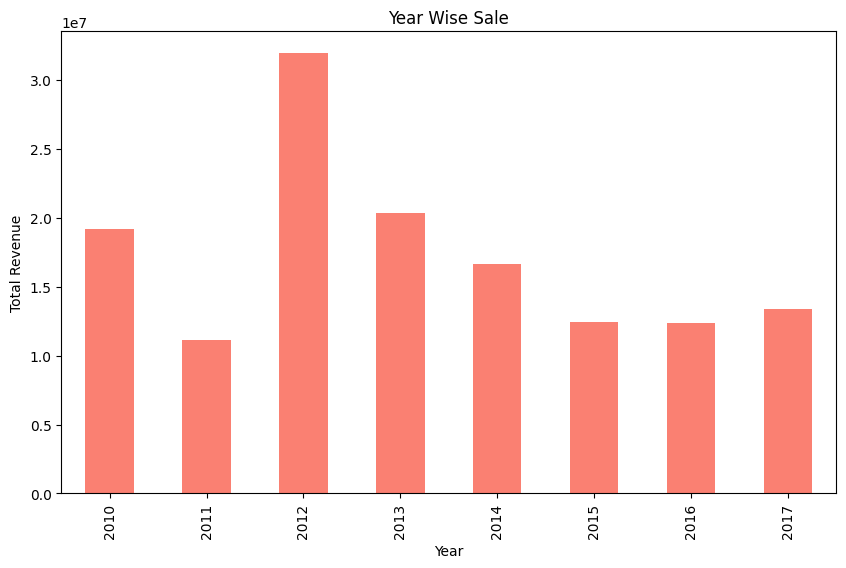


Yearly-Monthly Sales Trend:
Year-Month
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07    4445093.92
2012-08     576782.80
2012-09    4648152.72
2012-10    3042246.77
2013-02    3296425.02
2013-03     835759.10
2013-04    3262562.10
2013-06    1352867.40
2013-07    8545511.20
2013-08      89623.98
2013-09      71253.21
2013-10    2702770.40
2013-12     173676.25
2014-02    1819660.25
2014-04    4510578.10
2014-05    3060338.59
2014-06      75591.66
2014-07     688641.85
2014-08     455479.04
2014-09      20404.71
2014-10    1352370.65
2014-11    4647149.58
2015-01    5513227.50
2015-02    200

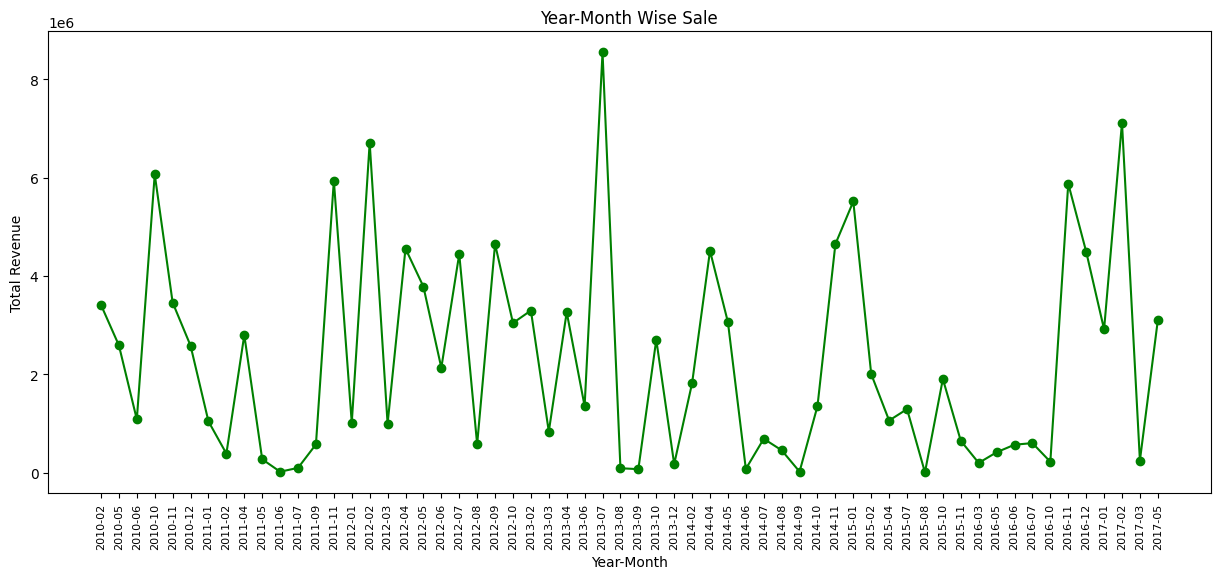

<ipython-input-143-b4f0fee604ed>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trend = df.groupby('Month Year').sum()['Total Profit'].reset_index()


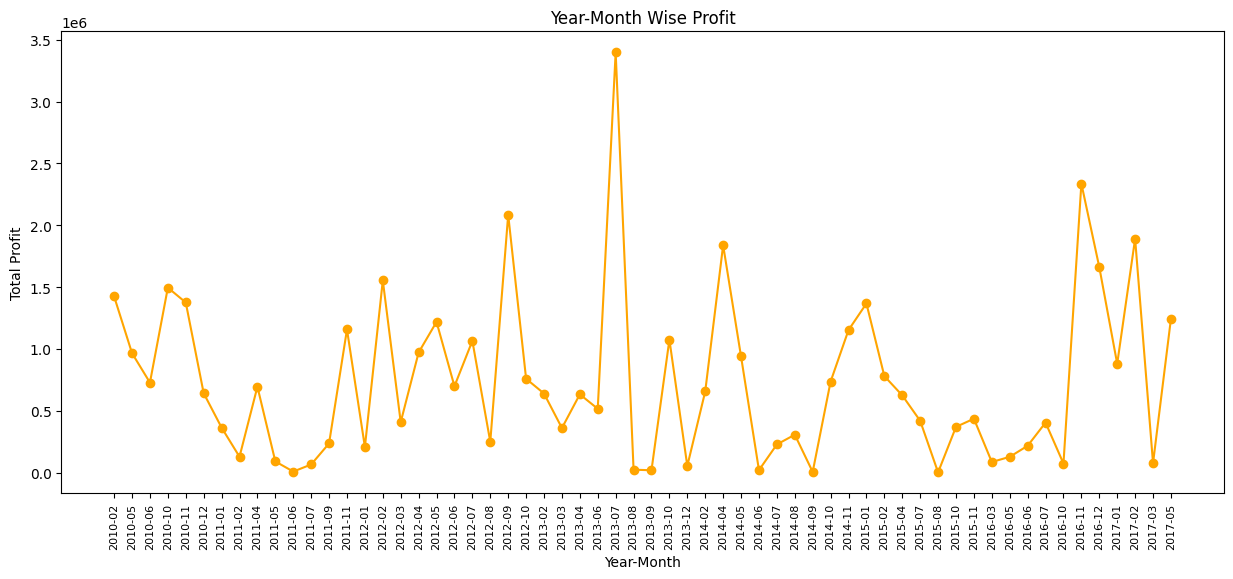

<ipython-input-143-b4f0fee604ed>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year_trend = df.groupby('Year').sum()['Total Profit']


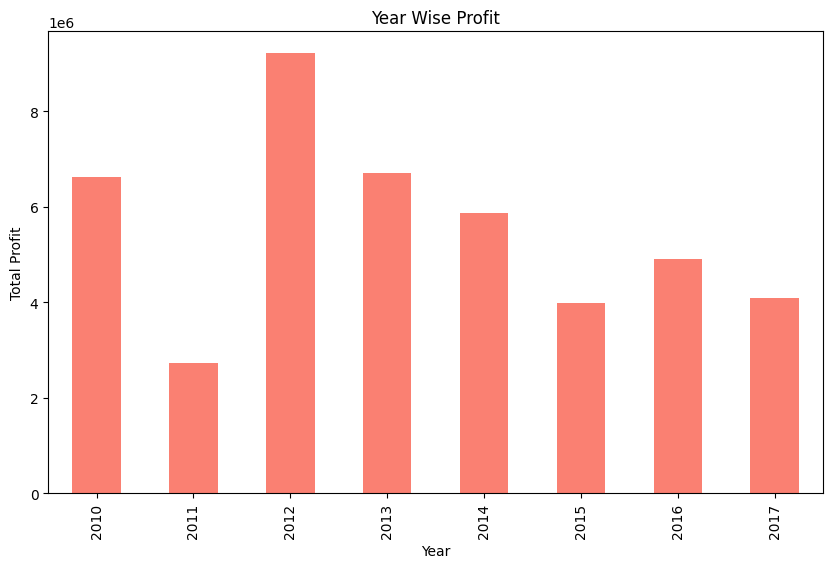

<ipython-input-143-b4f0fee604ed>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month_trend = df.groupby('Month').sum()['Total Profit']


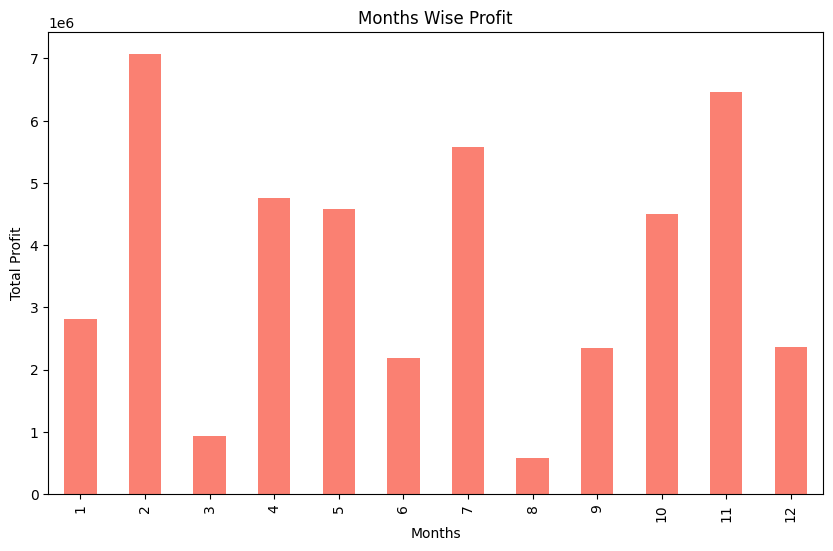

In [144]:
file_path = 'Amazon Sales data.csv'
df = read_and_preprocess_data(file_path)
plot_monthly_sales_trend(df)
plot_yearly_sales_trend(df)
plot_yearly_monthly_sales_trend(df)
plot_profit_trends(df)